[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


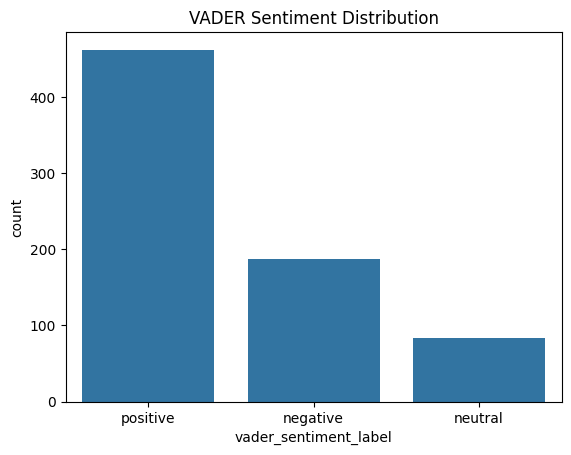

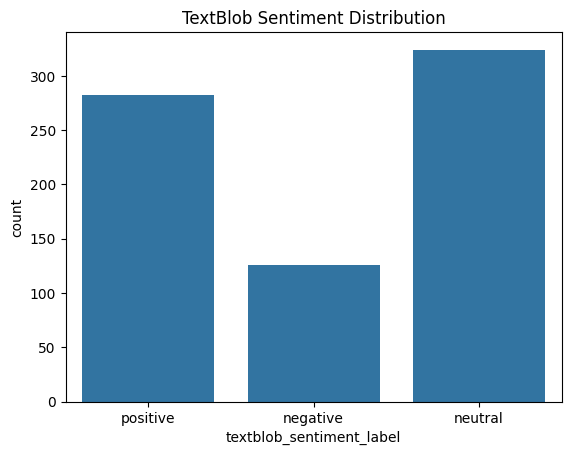

In [ ]:
# Step 1: Install necessary libraries
!pip install pandas nltk vaderSentiment textblob

# Step 2: Import Libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Step 3: Load Your Data
file_path = '/content/drive/My Drive/research/sentimentdataset.csv'
df = pd.read_csv(file_path)

# Step 4: VADER Sentiment Analysis

# Initialize the VADER sentiment intensity analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def vader_sentiment_score(text):
    return vader_analyzer.polarity_scores(text)

# Apply VADER sentiment analysis to each comment
df['vader_sentiment'] = df['Text'].apply(vader_sentiment_score)

# Extract compound score
df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])

# Classify sentiment as positive, neutral, or negative
df['vader_sentiment_label'] = df['vader_compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Step 5: TextBlob Sentiment Analysis

# Function to get TextBlob sentiment scores
def textblob_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply TextBlob sentiment analysis to each comment
df['textblob_sentiment'] = df['Text'].apply(textblob_sentiment_score)

# Classify sentiment as positive, neutral, or negative
df['textblob_sentiment_label'] = df['textblob_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Step 6: Analyze and Compare Results

# Compare VADER and TextBlob sentiment classifications
comparison = df[['Text', 'vader_sentiment_label', 'textblob_sentiment_label']]
comparison.head()

# Step 7: Visualize the Results (Optional)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot VADER sentiment distribution
sns.countplot(x='vader_sentiment_label', data=df)
plt.title('VADER Sentiment Distribution')
plt.show()

# Plot TextBlob sentiment distribution
sns.countplot(x='textblob_sentiment_label', data=df)
plt.title('TextBlob Sentiment Distribution')
plt.show()
